
# <font color='red'> <center> Challenge 1 - Unsupervised Learning </font>
# <font color='red'> <center> 17/10/2025</font>
## <font color='red'> <center> Auteurs: Astrid MARION</font>
---  
---
    

**The objective** of this challenge is to analyse a dataset and to applied an unsupervised learning algorithm.

In [180]:
# Libraries: Standard ones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Library for boxplots
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Partie 1: Visualisation

In [181]:
# Load the data: food
spotify_origin = pd.read_csv("playlist_dataset.csv",sep=",")
spotify = spotify_origin.copy() #pon travaille avec une copie
spotify.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk', 'punk', 'rock', 'socal pop punk']",75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country dawn', 'country road']",61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge', 'rap metal', 'rock']",83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [182]:
spotify.describe()


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


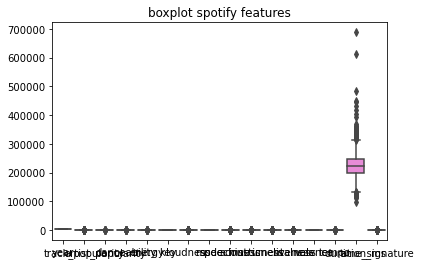

In [183]:
# Boxplot 
plt.figure()
plt.title('boxplot spotify features')
food_box=sns.boxplot(data=spotify)   # fliersize is the size used to indicate the outliers (fliersize=10)

plt.show()
# Pas très représentatif

# Partie 2: Nettoyage des données

## A - Valeurs manquantes

In [184]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [185]:
pd.isnull(spotify).apply(func=sum)

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [186]:
spotify[spotify.isna().any(axis=1)]
# Une seule ligne avec des valeurs Na = ligne 447

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
447,https://open.spotify.com/playlist/37i9dQZF1DWTWdbR13PQYH,2004,6MFQeWtk7kxWGydnJB2y36,These Words,68,Unwritten,7o95ZoZt5ZYn31e9z1Hc0a,Natasha Bedingfield,"['dance pop', 'pop', 'post-teen pop']",64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# suppression de la ligne 447 et vérification
spotify = spotify.dropna()
pd.isnull(spotify).apply(func=sum)

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

## B - Analyse des variances des colonnes et traitement 

In [188]:
#encoder les varibles catégorielles

non_numeric_cols = spotify.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols
spotify_numeric = pd.DataFrame()
for col in list(spotify.columns):
    if col in non_numeric_cols:
        le = LabelEncoder()
        spotify_numeric[col] = le.fit_transform(spotify[col])
    else:
        spotify_numeric[col] = spotify[col]

#Supression ligne 447 dans spotify_numeric
spotify_numeric = spotify_numeric.dropna()

# Analyse des variances de chaque colonne
selVarianceThreshold = VarianceThreshold()
spotifyVariance = selVarianceThreshold.fit_transform(spotify_numeric)
print(np.sort(selVarianceThreshold.variances_))
# CONCLUSION: on enlève les colonnes de spotify ayant une variance inferieur à 1

selVarianceThreshold2 = VarianceThreshold(threshold=1)
spotify_remove = selVarianceThreshold2.fit_transform(spotify_numeric)

# Récupérer un masque booléen (True = conservée, False = supprimée)
support_mask = selVarianceThreshold2.get_support()

colonnes_supprimees = spotify.columns[~support_mask]
spotify = spotify.drop(colonnes_supprimees, axis=1)
spotify_numeric = spotify_numeric.drop(colonnes_supprimees, axis=1)

[7.05423412e-03 8.54587399e-03 1.73206620e-02 1.98844144e-02
 2.71710264e-02 4.15501032e-02 4.79845493e-02 5.18541968e-02
 2.40327988e-01 4.32939761e+00 1.10000000e+01 2.20000000e+01
 2.20000000e+01 7.10000000e+01 1.00000000e+02 1.50838000e+02
 6.97000000e+02 8.90000000e+02 8.90000000e+02 1.66200000e+03
 2.11900000e+03 2.20000000e+03 5.91060000e+05]


# Partie 3 - Analyses factorielles

## A - PCA

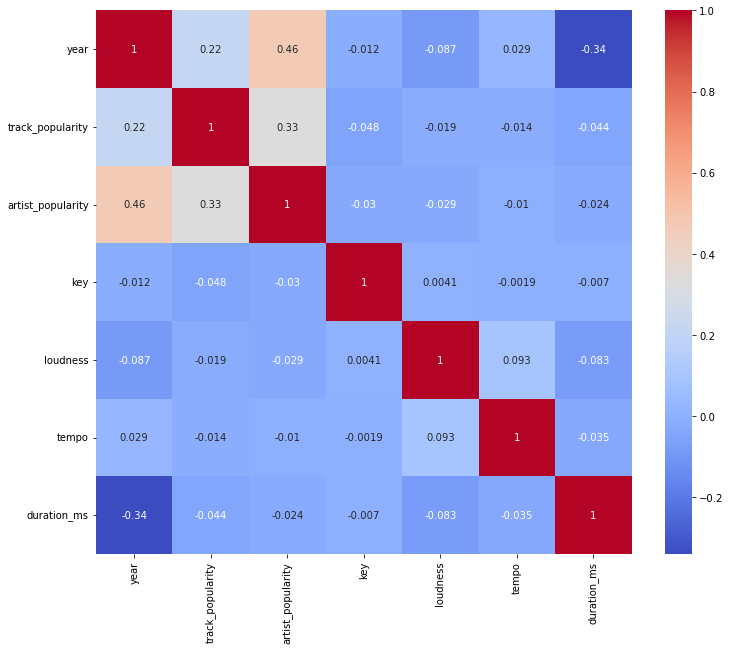

In [189]:
# Affichage heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spotify.corr(), cmap="coolwarm", annot=True) # les variables ayant coefficient > 0.8 portent souvent la même info
plt.show()

In [190]:
# # Etape de standardisation
# scaler = StandardScaler()
# spotify_scaled = scaler.fit_transform(spotify_numeric)

# #Application PCA
# pca = PCA()
# spotify_numeric = pca.fit_transform(spotify_numeric)
# explained_variance=pca.explained_variance_ratio_

# cumulative_variance = np.cumsum(explained_variance) # variance total exprimée par les première k-composantes
# np.linalg.matrix_rank(spotify_scaled)

####################################################
################ A TERMINER ########################
####################################################

## Partie 4 - Clustering

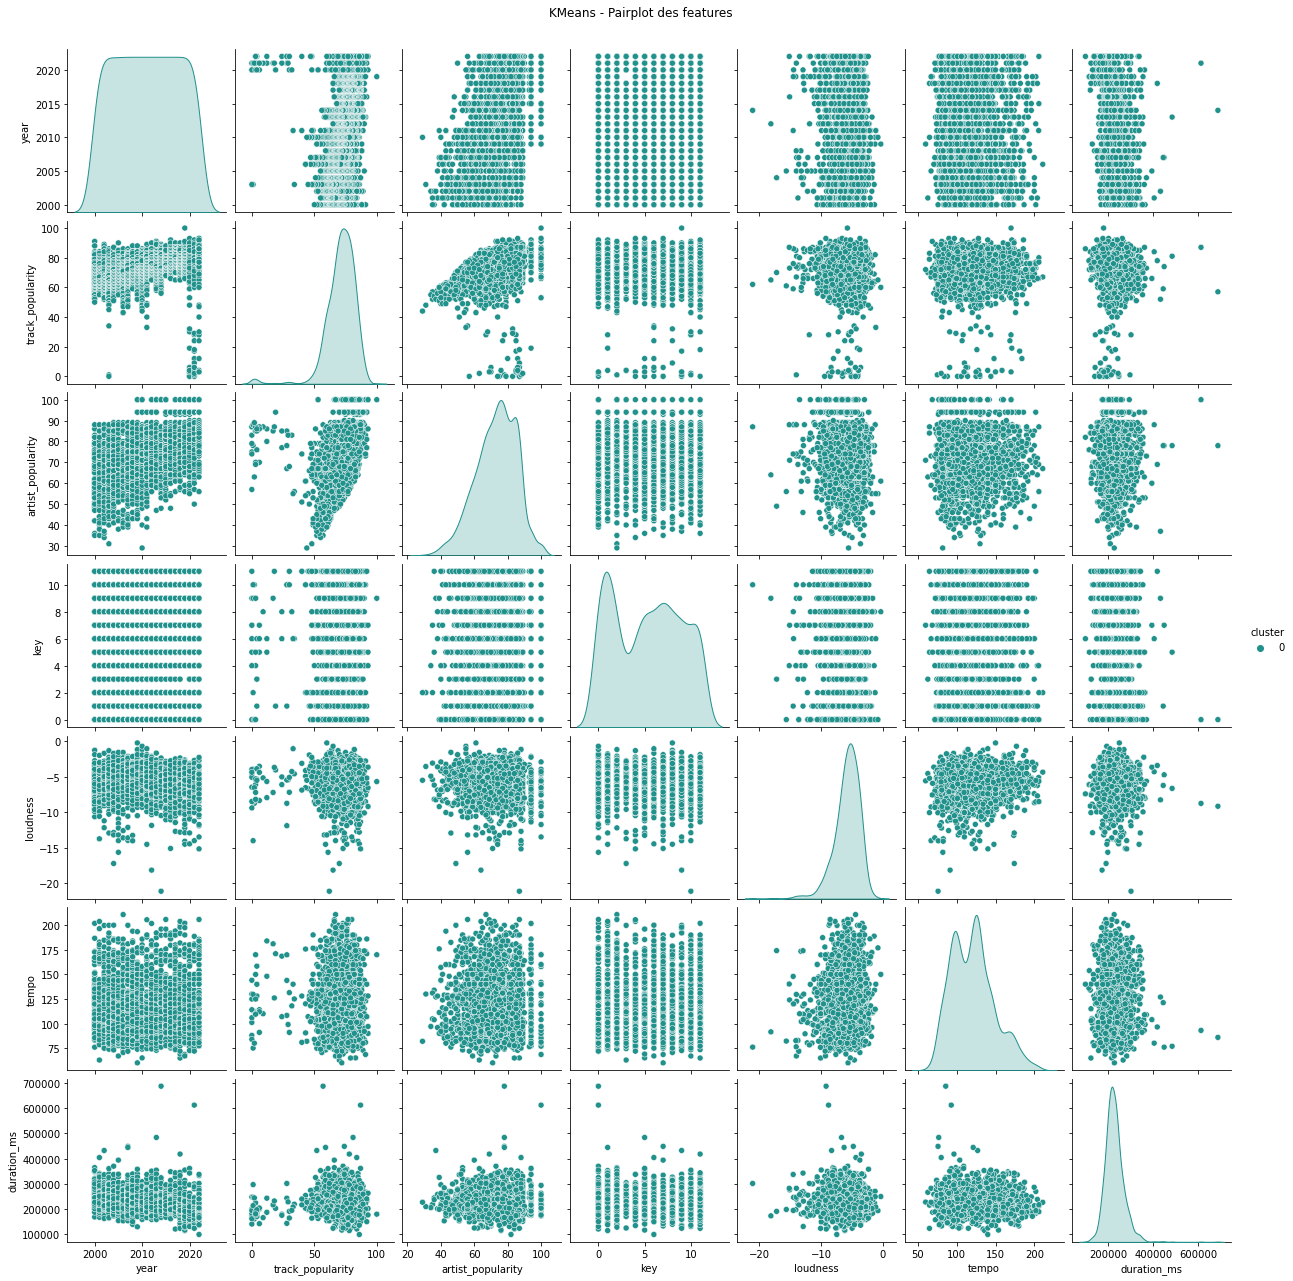

In [207]:
num_col = list(spotify.select_dtypes(include=['number']).columns.tolist())
kmeans = KMeans(n_clusters=1,n_init=1,init='random').fit(spotify[num_col])
# centers=kmeans.cluster_centers_
# print(centers)

# We also represent the data in 2D-space with colors corresponding to cluster
    
# plt.scatter(ruspini['x'], ruspini['y'],c=kmeans.labels_)
spotify["cluster"] = kmeans.labels_

sns.pairplot(spotify[num_col], hue="cluster", palette='viridis', diag_kind='kde')
plt.suptitle('KMeans - Pairplot des features', y=1.02)
plt.show()